In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Đọc file dữ liệu
df = pd.read_csv("C:\\Users\\ADMIN\\Downloads\\VCBB.csv")

df = df[['Price','Low']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df1 = df
# Split the data into training, testing, and validation
train_size = int(0.9 * len(df))
test_size = len(df1) - train_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

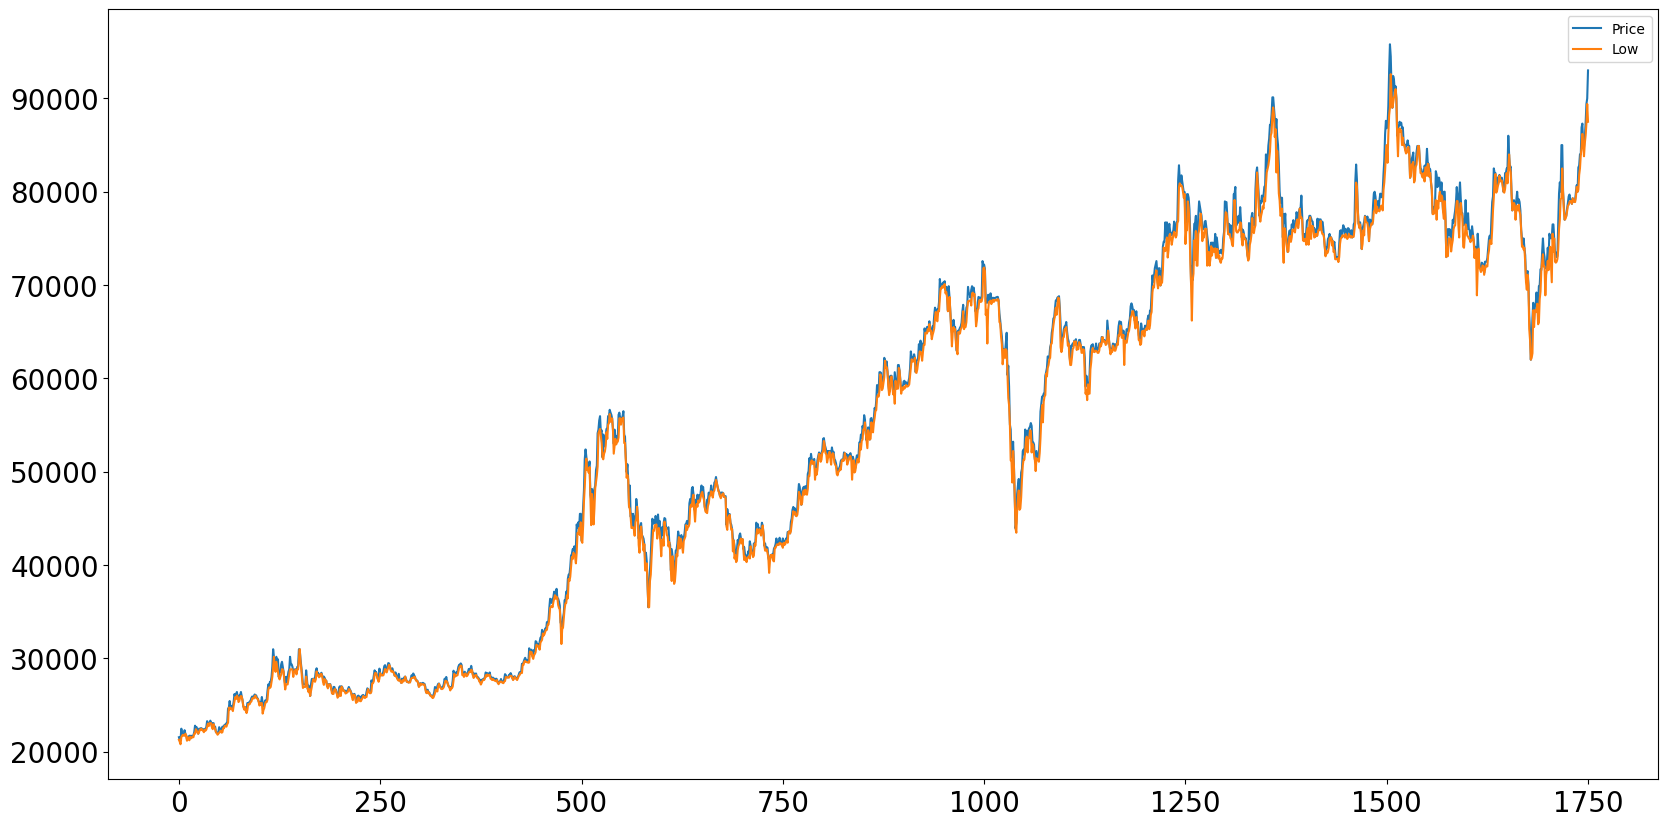

In [3]:
# Xem lại dataset
df.plot(figsize=(20, 10), fontsize=20)
plt.show()

In [4]:
# Tìm m thích hợp
# Dùng adf để kiểm tra xem dataset có stationary hay chưa
from statsmodels.tsa.stattools import adfuller
adfuller(df['Price'])

(-0.8600955336273238,
 0.8008294392866551,
 0,
 1750,
 {'1%': -3.4340922388213175,
  '5%': -2.863192990001633,
  '10%': -2.5676500029387754},
 28958.721362774268)

In [5]:
# Vì dataset chưa stationary nên ta thực hiện diff()
df_diff = df1['Price'].diff().dropna()

In [6]:
# Tiếp tục dùng adf để kiểm tra xem p value có < 0.05 ko
adfuller(df_diff)

(-14.573346314670854,
 4.5906577968256565e-27,
 8,
 1741,
 {'1%': -3.4341116127463858,
  '5%': -2.863201542300677,
  '10%': -2.567654556829725},
 28941.62014397561)

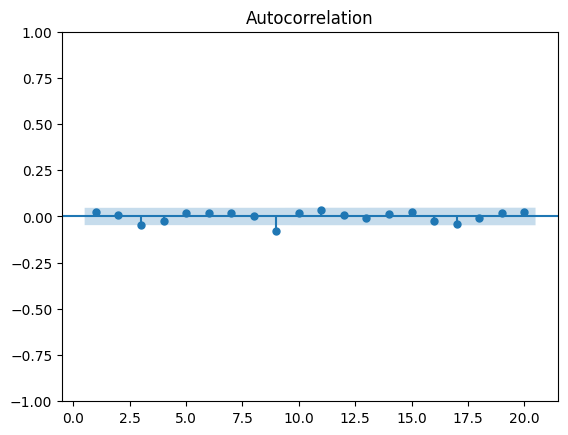

In [7]:
# Sau khi dataset đã stationary vẽ acf để tìm m
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_diff, lags = 20 , zero = False)
plt.show()

In [8]:
df

,Price,Low
0,21552,21283
1,21229,21067
2,21337,20798
3,22468,21552
4,21876,21714
...,...,...
1746,85800,85200
1747,87300,86000
1748,89400,87300
1749,90000,89400


In [9]:
# Tạo y_train, x_train
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])
# Dùng auto_arima để tìm thông số thích hợp
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, seasonal = True, m =5)

Performing stepwise search to minimize aic


 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=26250.417, Time=3.14 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=26257.540, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=26259.398, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=26259.389, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=26257.178, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[5] intercept   : AIC=26248.482, Time=2.31 sec
 ARIMA(2,1,2)(0,0,0)[5] intercept   : AIC=26248.616, Time=1.64 sec
 ARIMA(2,1,2)(0,0,2)[5] intercept   : AIC=26249.912, Time=2.94 sec
 ARIMA(2,1,2)(1,0,0)[5] intercept   : AIC=26248.553, Time=1.65 sec
 ARIMA(2,1,2)(1,0,2)[5] intercept   : AIC=26251.856, Time=2.58 sec
 ARIMA(1,1,2)(0,0,1)[5] intercept   : AIC=26261.044, Time=0.73 sec
 ARIMA(2,1,1)(0,0,1)[5] intercept   : AIC=26260.690, Time=0.52 sec
 ARIMA(3,1,2)(0,0,1)[5] intercept   : AIC=26250.883, Time=2.22 sec
 ARIMA(2,1,3)(0,0,1)[5] intercept   : AIC=26249.684, Time=1.35 sec
 ARIMA(1,1,1)(0,0,1)[5] intercept   : AIC=26261.344, Time=0.33

In [10]:
# Dùng SARIMAX để train model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model1 = SARIMAX(y_train, exog = np.array(train_data['Price']), order=(2,1,2), seasonal_order=(1, 0, 0, 5))
model_fit = model1.fit()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
# Quá trình test
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
exg = np.array(test_data['Low'])
y_pred_test = model_fit.predict(start=len(y_train), end=len(y_test)+len(y_train)-1, exog=exg)
y_pred_test

array([74000., 73100., 75000., 74800., 75000., 73600., 74300., 74800.,
       76000., 76300., 76400., 78000., 79000., 79000., 76400., 75100.,
       78100., 78800., 77700., 77400., 74100., 74000., 75300., 76500.,
       76100., 75300., 75200., 75000., 74900., 74600., 74800., 74800.,
       75300., 74800., 72900., 73900., 73600., 68900., 71700., 73900.,
       72000., 71700., 71400., 71600., 72100., 72000., 71100., 71600.,
       72100., 72000., 72000., 73200., 73700., 74800., 74700., 74400.,
       76000., 78000., 79400., 81100., 81900., 79900., 80100., 80600.,
       80900., 81700., 81100., 81200., 81200., 80600., 80000., 79900.,
       80300., 81300., 82000., 80900., 82500., 84000., 82500., 82100.,
       79800., 78000., 78200., 78800., 78600., 77000., 78100., 78500.,
       78000., 78600., 77900., 77500., 75800., 74100., 74200., 73800.,
       74000., 72400., 70300., 69500., 71100., 69900., 65300., 64100.,
       62000., 62200., 62700., 67300., 65500., 67300., 67300., 67100.,
      

In [12]:
# Quá trình tạo index predict 30 ngày tiếp theo
# Dùng thuật toán LR để tìm giá trị Low cho 30 ngày tiếp theo
from sklearn.linear_model import LinearRegression

ln_model = LinearRegression()

ln_model.fit(np.array(train_data.index).reshape(-1,1), train_data['Price'])

last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Dự đoán giá trị price 30 ngày tiếp theo
price_next_30_days = ln_model.predict(x_next_30_days)

# Predict prices for the next 30 days
y_next_30_days = model_fit.predict(start=len(x_train), end = len(x_train)+ len(x_next_30_days)-1, exog=price_next_30_days)
# Print the predicted closing prices for the next 30 days
print('Predicted prices for the next 30 days:')
print(y_next_30_days)

Predicted prices for the next 30 days:
[92698.21311548 92740.55407752 92782.89503955 92825.23600159
 92867.57696362 92909.91792566 92952.25888769 92994.59984972
 93036.94081176 93079.28177379 93121.62273583 93163.96369786
 93206.3046599  93248.64562193 93290.98658397 93333.327546
 93375.66850803 93418.00947007 93460.3504321  93502.69139414
 93545.03235617 93587.37331821 93629.71428024 93672.05524228
 93714.39620431 93756.73716634 93799.07812838 93841.41909041
 93883.76005245 93926.10101448]


In [13]:
# Đánh giá độ chính xác thuật toán với MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
print('Testing RMSE:', test_rmse)

# MAPE (thay thế MSE bằng MAPE)
test_mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
print('Testing MAPE:', test_mape)

# MAE
test_mae = np.mean(np.abs(y_pred_test - y_test))
print('Testing MAE:', test_mae)


Testing RMSE: 1597.4944871152559
Testing MAPE: 1.4140075219583552
Testing MAE: 1090.3409090909083


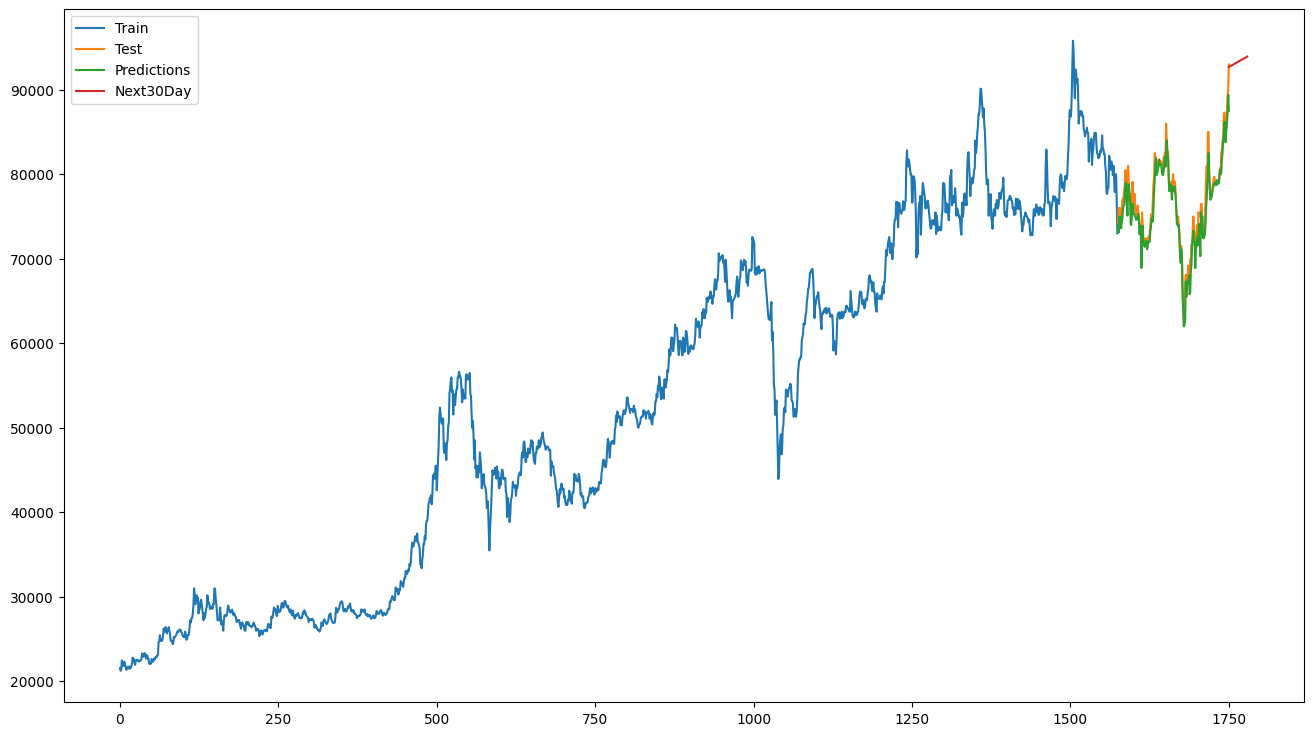

In [14]:
plt.figure(figsize=(16,9))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred_test)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()